In [211]:
"""
    This script does the analysis on the facebook data collected and analyzes the trends on how the 
    messages are recieved by a person, this also has a visualization. You need to close one graph to see other
    graph, download the messages data from facebook and give the absolute path of the script.

    Command:
        python messages_json_plot.py --msg ./messages
    
    Author:
        Farhaan Bukhsh <farhaan@fedoraproject.org>
        Anubhav Singh
"""
import pandas as pd
import json
import os
import datetime
import matplotlib.pyplot as plt
import operator
import argparse


class FacebookMessageAnalyser:
    """ This class is used to analyse and visualize facebook message data"""

    def __init__(self):
        self.conversations = []
        self.all_messages = []
        self.who_i_message=dict()
        self.monthly_aggregate = None
        self.yearly_aggregate = None
        self.daily_aggregate = None

    def __call__(self, messages_dir):
        self.conversations = self.get_all_conversation(messages_dir)
        self.populate_all_messages(messages_dir)
        self.create_manipulate_dataframes()
        self.visualize_data(self.monthly_aggregate, "Number of Months",
                            "Cummulative Messages", "Cummulative Monthly Messages", "Monthly Plot")
        self.visualize_data(self.daily_aggregate, "Number of Days",
                            "Cummulative Messages", "Cummulative Daily Messages", "Daily Plot")
        self.visualize_data(self.yearly_aggregate, "Years", "Cummulative Messages",
                            "Cummulative Yearly Messages", "Yearly Plot")

    def get_all_conversation(self, messages_dir):
        """
            :params message_dir: The location of the directory
            :returns: a list of all the directory i.e conversations
            Returns a list of all the converstaion that has taken place.
        """
        conversations = []
        dirs = [convo for convo in os.listdir(
            messages_dir) if os.path.isdir(messages_dir+"/"+convo) == True]
        # Sanitary check to see if there is a message.json file present
        for d in dirs:
            files = [x for x in os.listdir(
                messages_dir+"/"+d) if os.path.isfile(messages_dir+"/"+d+"/"+x) == True]
            try:
                if files[0] == "message.json":
                    conversations.append(d)
            except:
                pass
        return conversations

    def populate_all_messages(self, messages_dir):
        """
            :params message_dir: The location of the directory
            Populate all the messages user has reciceved.
        """
        for convo in self.conversations:
            f = messages_dir + "/" + convo + "/" + "message.json"
            with open(f) as msg_json_f:
                msg_json = json.load(msg_json_f)
                count=0
                for msg in msg_json["messages"]:
                    values=[]
                    self.all_messages.append(msg)
                    values=[x for x in msg.values()]
                    #print(values)
                    #print("me")
                    if values[0] == 'Anirban Panda':
                            count=count+1
                title=[]
                if len(msg_json["participants"]) == 2:
                    for x in msg_json["participants"]:
                        title=[x for  x in x.values()]
                        #print(title)
                        if title[0] != 'Anirban Panda':
                            self.who_i_message[title[0]]=count
                        
                
                
                
                #self.who_i_message[msg_json["title"]]=count
        print(self.who_i_message)        
    def create_manipulate_dataframes(self):
        """
            This method is used to get all the required columns
            to the dataframe and store the appropriate aggregation in the
            variables. 
        """
        msgdf = pd.DataFrame.from_dict(self.all_messages)
        msgdf = msgdf[["timestamp_ms", "sender_name"]]
        msgdf["time"] = msgdf["timestamp_ms"].apply(
            lambda x: datetime.datetime.fromtimestamp(x/1000))
        msgdf["year"] = msgdf["time"].apply(lambda convo: convo.year)
        msgdf["month"] = msgdf["time"].apply(
            lambda convo: convo.month)
        msgdf["day"] = msgdf["time"].apply(lambda convo: convo.day)
        self.yearly_aggregate = msgdf["year"].value_counts()
        self.monthly_aggregate = msgdf["month"].value_counts()
        self.daily_aggregate = msgdf["day"].value_counts()

    def cumulative_list(self, lists):
        """
            :params list: The list of values that has to be cummilated
            :returns: The cummilated list

            Turn the dicrete values into continuous value
        """
        cu_list = []
        length = len(lists)
        cu_list = [sum(lists[0:convo + 1]) for convo in range(0, length)]
        return cu_list

    def visualize_data(self, visualize_points, xlable, ylable, title, msg):
        """
            Create visualization for the given points and show the lables
        """
        print(msg)
        x_axis = visualize_points.index.tolist()[::-1]
        y_axis = visualize_points.tolist()[::-1]
        y_axis = self.cumulative_list(y_axis)
        x, y = zip(*sorted(zip(x_axis, y_axis), key=operator.itemgetter(0)))
        plt.xlabel(xlable)
        plt.ylabel(ylable)
        plt.title(title)
        plt.plot(x, y)
        plt.show()




In [212]:
facebook=FacebookMessageAnalyser()

{'Ravi Bajaj': 1, 'Siddharth Das': 166, 'Lopamudra Dash': 0, 'V Sai Subhankar': 3, 'Sidharth Sahoo': 85, 'Abhay Kumar Sahoo': 763, 'Kshitij Agrawal': 0, 'Akanksha Das': 0, 'Sashwat Nayak': 73, 'Diptiman Pati': 25, 'Alok Sahu': 128, 'Priyesh Jena': 4, 'Pavan Kumar Vns': 1, 'Mayank Soni': 5, 'Ankit Kumar Panda': 1, 'Akshat Jain': 0, 'Bhubanendra Mishra': 668, 'Abhisek Panda': 0, 'Saurabh Agarwal': 21, 'Sangeet Kumar Mishra': 54, 'Chetan Jagelinki': 2, 'Arabinda Panda': 0, 'Prashant Nath': 1, 'Siddharth Chandan': 4, 'Anshuman Jena': 1, 'Vytla Dinesh Chandra': 0, 'Anirudh Ponna': 137, 'Prateek Tripathy': 1, 'Navneet Priyadarshi': 0, 'Maneesh Jena': 27, 'Harshvardhan Mittal': 0, 'Yudhisthir Behera': 44, 'Hritik Ray': 4, 'Aditya Singhania': 1, 'Sourav Nayak': 55, 'Annanya Singh': 34, 'Rakesh Bal': 10, 'Peeyush Mishra': 61, 'Roshan Kumar Shaw': 0, 'Idal Poorekhorsandi': 7, 'Archana Gupta': 44, 'Pratyush Choudhury': 96, 'Subhankar Chakraborty': 40, 'Utkarsh Raj': 0, 'Kumar Swapnil': 5, 'Roshan

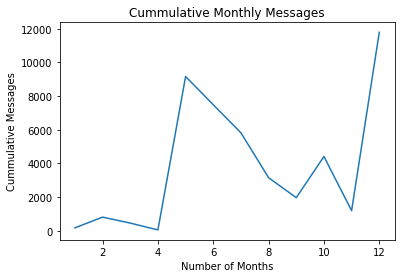

Daily Plot


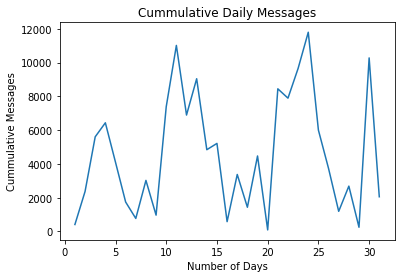

Yearly Plot


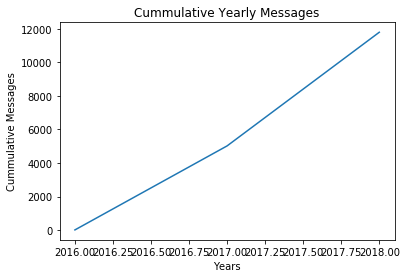

In [213]:
facebook.__call__("/home/hadesanirban/facebookdata/messages/inbox")

In [27]:
type(self.all_messages)

NameError: name 'self' is not defined